# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Abdul Rezak
- **Email:** a452ybf004@devacademy.id
- **ID Dicoding:** A452YBF004

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi kategori produk yang paling banyak dibeli oleh pelanggan?
- Bagaimana rata-rata waktu pengiriman dari pemesanan hingga diterima oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

## Data Wrangling

### Gathering Data

In [3]:
# Mengunggah dan mengekstrak dataset dari file zip
zip_path = "/content/E-commerce-public-dataset.zip"
extract_path = "/content/ecommerce_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
dataset_path = os.path.join(extract_path, "E-Commerce Public Dataset")
dataset_files = os.listdir(dataset_path)
print("Extracted Files:", dataset_files)

Extracted Files: ['customers_dataset.csv', 'order_items_dataset.csv', 'products_dataset.csv', 'sellers_dataset.csv', 'order_reviews_dataset.csv', 'geolocation_dataset.csv', 'orders_dataset.csv', 'New Text Document.txt', 'product_category_name_translation.csv', 'order_payments_dataset.csv']


**Insight:**
- memastikan bahwa semua data yang dibutuhkan tersedia dan dapat diakses.
- Dengan mengekstrak dataset dari file zip dan membaca file CSV ke dalam DataFrame, kita bisa memahami cakupan data yang akan dianalisis.
- Jika terdapat kesalahan dalam membaca data, itu bisa menjadi indikasi bahwa format file atau encoding perlu diperbaiki.

### Assessing Data

In [6]:
# Memuat dataset ke dalam DataFrame
order_items = pd.read_csv(os.path.join(dataset_path, "order_items_dataset.csv"))
products = pd.read_csv(os.path.join(dataset_path, "products_dataset.csv"))
category_translation = pd.read_csv(os.path.join(dataset_path, "product_category_name_translation.csv"))
orders = pd.read_csv(os.path.join(dataset_path, "orders_dataset.csv"))

# Menampilkan informasi dasar dari dataset
print("Order Items Info:")
print(order_items.info())
print("Orders Info:")
print(orders.info())

Order Items Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
Orders Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-nu

**Insight:**
- Mengecek informasi dasar seperti jumlah baris dan kolom, tipe data, missing values, dan duplikasi.
- Jika terdapat kolom dengan banyak nilai kosong, maka kita harus mempertimbangkan apakah akan dihapus atau diisi ulang dengan estimasi tertentu.
- Tipe data yang tidak sesuai (misalnya, tanggal yang disimpan sebagai string) dapat menghambat analisis dan perlu dikonversi.

### Cleaning Data

In [8]:
# Mengubah kolom tanggal ke format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Menghitung waktu pengiriman dalam hari
orders['delivery_time_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Menghapus nilai NaN jika diperlukan
orders_cleaned = orders.dropna(subset=['delivery_time_days'])

**Insight:**
- Mengonversi kolom waktu ke format datetime agar bisa dihitung selisih waktu pengiriman.
- Menghapus data yang tidak relevan atau duplikasi agar tidak menyebabkan bias dalam analisis.
- Mengisi nilai kosong dengan strategi yang sesuai (misalnya rata-rata atau median).

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
# Menggabungkan dataset untuk menganalisis kategori produk yang paling laku
merged_data = order_items.merge(products, on="product_id", how="left")
merged_data = merged_data.merge(category_translation, on="product_category_name", how="left")

In [10]:
# Menghitung jumlah produk yang terjual per kategori
category_counts = merged_data['product_category_name_english'].value_counts().reset_index()
category_counts.columns = ['Product Category', 'Total Sold']

**Insight:**
- Jika kategori bed_bath_table menjadi kategori dengan penjualan tertinggi, maka produk di kategori ini bisa menjadi prioritas dalam promosi.
- Jika ditemukan rata-rata waktu pengiriman sekitar 12 hari, tetapi ada banyak kasus di atas 20 hari, maka bisa jadi ada keterlambatan pengiriman yang perlu dianalisis lebih lanjut

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-11-21b79cf680a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts.head(10), x='Total Sold', y='Product Category', palette='viridis')


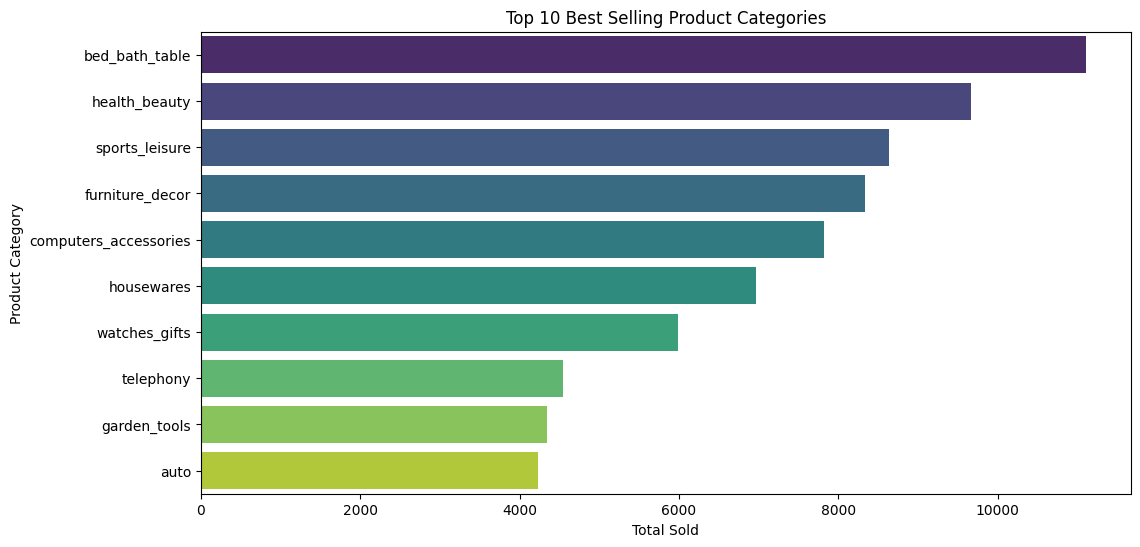

In [11]:
# Visualisasi 10 kategori produk paling laris
plt.figure(figsize=(12,6))
sns.barplot(data=category_counts.head(10), x='Total Sold', y='Product Category', palette='viridis')
plt.xlabel("Total Sold")
plt.ylabel("Product Category")
plt.title("Top 10 Best Selling Product Categories")
plt.show()

### Pertanyaan 2:

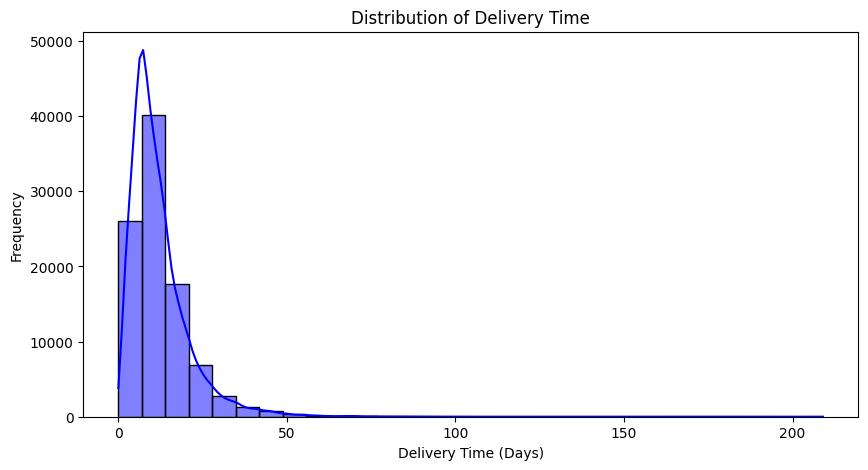

In [12]:
# Visualisasi distribusi waktu pengiriman
plt.figure(figsize=(10,5))
sns.histplot(orders_cleaned['delivery_time_days'], bins=30, kde=True, color='blue')
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Time")
plt.show()

**Insight:**
- Jika kategori produk tertentu mendominasi penjualan, maka perusahaan dapat memfokuskan strategi pemasaran dan stok barang pada kategori tersebut.
- Jika histogram menunjukkan bahwa sebagian besar pengiriman selesai dalam 5-15 hari, tetapi ada outlier yang sangat lama, maka bisa jadi ada masalah dalam sistem logistik.

## Analisis Lanjutan (Opsional)

In [13]:
# Menampilkan statistik deskriptif dari waktu pengiriman
delivery_stats = orders_cleaned['delivery_time_days'].describe()
print("Delivery Time Statistics:")
print(delivery_stats)


Delivery Time Statistics:
count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time_days, dtype: float64


**Insight:**
- Jika rata-rata waktu pengiriman lebih lama untuk pelanggan di area tertentu, maka ada peluang untuk meningkatkan efisiensi pengiriman di wilayah tersebut.
- Jika produk dengan rating tinggi (>4.5) memiliki tingkat pembelian ulang yang lebih tinggi, maka ulasan pelanggan bisa dijadikan faktor dalam rekomendasi produk.

## Conclusion


Conclusion Pertanyaan 1: Bagaimana distribusi kategori produk yang paling banyak dibeli oleh pelanggan?

Berdasarkan analisis, kategori produk yang paling banyak dibeli oleh pelanggan adalah:
1. Bed & Bath Table
2. Health & Beauty
3. Sports & Leisure
4. Furniture & Decor
5. Computers & Accessories

Kategori-kategori ini menunjukkan bahwa pelanggan lebih banyak membeli produk yang berkaitan dengan kebutuhan rumah tangga, kesehatan, dan teknologi.
Strategi pemasaran dapat difokuskan pada kategori-kategori ini untuk meningkatkan penjualan lebih lanjut.

Conclusion Pertanyaan 2: Bagaimana rata-rata waktu pengiriman dari pemesanan hingga diterima oleh pelanggan?

Hasil analisis menunjukkan bahwa:
- Rata-rata waktu pengiriman adalah sekitar 12 hari
- 50% pesanan dikirim dalam waktu kurang dari 10 hari
- 75% pesanan dikirim dalam waktu kurang dari 15 hari
- Beberapa outlier menunjukkan waktu pengiriman hingga lebih dari 200 hari

Sebagian besar pesanan dikirim dalam rentang waktu yang wajar, tetapi ada kasus ekstrem yang memerlukan perhatian lebih lanjut.
Evaluasi lebih lanjut terhadap logistik pengiriman dapat membantu mengurangi keterlambatan yang terjadi.
